<h1> A3: Predicting Car Price</h1>

In this assignment, I will use Car Price Dataset to solve the classification problem that will classified car price into 4 groups (0,1,2,3) by implementing the Logistic Regression. I will add some features  and perform some expirements using ML flow and lastly deploy my docker to the virtual machine.

This is a classification problem trying to classify car price into 4 categories (0,1,2,3).
<br>
<ul>The followings describe the feautres:
<br></br>
<b>
<li>name : car brand
<li>year : manufactured year
<li>selling_price : selling price that I will predict
<li>km_driven : total driven km
<li>fuel : type of fuel used by the car
<li>seller_type : type of selling people
<li>transmission : it is about auto or manual
<li>owner : type of owner
<li>mileage : how many mile can be reach within an hour
<li>engine : engine power
<li>max_power
<li>torque
<li>seats : total seats of the car
</b>
</ul>

<h2> Task1. Preparing the datasets </h2>

<h3> Importing Libraries </h3>

In [143]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
import ppscore as pps
import matplotlib as mpl
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import time
warnings.filterwarnings('ignore')

In [144]:
# checking version
print(f"     numpy version: {np.__version__}")
print(f"    pandas version: {pd.__version__}")
print(f"   seaborn version: {sns.__version__}")
print(f"       pps version: {sns.__version__}")
print(f"   sklearn version: {sklearn.__version__}")
print(f"matplotlib version: {mpl.__version__}")

     numpy version: 1.25.2
    pandas version: 1.5.3
   seaborn version: 0.12.2
       pps version: 0.12.2
   sklearn version: 1.3.0
matplotlib version: 3.7.2


<h3>1. Load Data</h3>

In [145]:
#read csv
df = pd.read_csv('Cars.csv')

In [146]:
#print the first row of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [147]:
#check the shape of the data
df.shape 

(8128, 13)

In [148]:
#statistical info Hint:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [149]:
#check data types of the input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [150]:
#check the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

<h3>2. Exploratory Data Analysis</h3>

EDA is an essential step to inspect the data, so to better understand nature of the given data.

<h4> Renaming </h4>

In [151]:
#Rename "Name" Column to "brand", I will not rename for the rest columns as it is already perfect.
df.rename (
    columns= {'name' : 'brand'}, inplace = True
)

In [152]:
#check the columns name
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

<h4> Label Encoding </h4>

Now, I would like to change feature "owner" values to numerical values by mapping <b> First Owner = 1, ..., Test Drive Cars = 5

In [153]:
#check the owner column unique value
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [154]:
#import labelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['owner'] = le.fit_transform (df['owner'])+1
df['owner'].unique()

array([1, 3, 5, 2, 4])

In [155]:
le.classes_

array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
       'Test Drive Car', 'Third Owner'], dtype=object)

Again, I will do label encoding for "transmission" feature

In [156]:
#check for my array
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [157]:
df['transmission'] = le.fit_transform(df['transmission'])
df['transmission'].unique()

array([1, 0])

<h4> Other Preparation </h4>

For feature "fuel", I will remove all rows with the value 'CNG' and 'LPG'

In [158]:
df.shape

(8128, 13)

In [159]:
# Delete rows where 'fuel' == 'CNG'
# Using drop() to delete rows based on column value
df.drop(df[df['fuel'] == 'CNG'].index, inplace = True)

In [160]:
#check after dropping CNG
df.shape

(8071, 13)

In [161]:
# Delete rows where 'fuel' == 'LPG'
# Using drop() to delete rows based on column value
df.drop(df[df['fuel'] == 'LPG'].index, inplace = True)

In [162]:
#check after dropping LPG
df.shape

(8033, 13)

In [163]:
df['fuel'] = le.fit_transform(df['fuel'])
df['fuel'].unique()

array([0, 1])

For feature 'mileage', I will remove 'kmpl' using df.mileage.str.split and 
convert column to numerical type (e.g. float)

In [164]:
#usage of split
# series.str.split (pad = None, *, n = -1, expand = flase, regex = None)

#df with split value of columns (set expand = True: it will return a df after splitted the values; n=1: total separations will be 1 time)
df1 = df["mileage"].str.split (" ",n = 1, expand = True)

#making the splitted 0 column as 'mileage' features and transform dtype as float
df['mileage'] = df1[0].astype('float64')

In [165]:
#check the datatype of a series
df['mileage']

0       23.40
1       21.14
2       17.70
3       23.00
4       16.10
        ...  
8123    18.50
8124    16.80
8125    19.30
8126    23.57
8127    23.57
Name: mileage, Length: 8033, dtype: float64

In [166]:
#check the datatype after changing to float
df['mileage']

0       23.40
1       21.14
2       17.70
3       23.00
4       16.10
        ...  
8123    18.50
8124    16.80
8125    19.30
8126    23.57
8127    23.57
Name: mileage, Length: 8033, dtype: float64

For feature 'engine', I will remove 'CC' and convert it datatype to numerical (float) 

In [167]:
#check feature 'engine'
df['engine']

0       1248 CC
1       1498 CC
2       1497 CC
3       1396 CC
4       1298 CC
         ...   
8123    1197 CC
8124    1493 CC
8125    1248 CC
8126    1396 CC
8127    1396 CC
Name: engine, Length: 8033, dtype: object

In [168]:
#remove CC of engine and put the results into temporary dataframe
df2 = df['engine'].str.split (' ', n = 1, expand = True)
df2

,0,1
0,1248,CC
1,1498,CC
2,1497,CC
3,1396,CC
4,1298,CC
...,...,...
8123,1197,CC
8124,1493,CC
8125,1248,CC
8126,1396,CC


In [169]:
#update the value: update the resulted df[0] to the original df
df['engine']  = df2[0]

#check the df['engine']
df['engine']

0       1248
1       1498
2       1497
3       1396
4       1298
        ... 
8123    1197
8124    1493
8125    1248
8126    1396
8127    1396
Name: engine, Length: 8033, dtype: object

In [170]:
#convert dtype of 'engin' to float
df['engine'] = df['engine'].astype('float64')
df['engine']

0       1248.0
1       1498.0
2       1497.0
3       1396.0
4       1298.0
         ...  
8123    1197.0
8124    1493.0
8125    1248.0
8126    1396.0
8127    1396.0
Name: engine, Length: 8033, dtype: float64

For feature 'maxpower', I will repeat the same steps as what I did to feature 'engine'

In [171]:
#check 'maxpower'
df['max_power']

0           74 bhp
1       103.52 bhp
2           78 bhp
3           90 bhp
4         88.2 bhp
           ...    
8123     82.85 bhp
8124       110 bhp
8125      73.9 bhp
8126        70 bhp
8127        70 bhp
Name: max_power, Length: 8033, dtype: object

In [172]:
#remove bhp and store to temp df
df3 = df['max_power'].str.split (" ", n = 1, expand = True)
df3

,0,1
0,74,bhp
1,103.52,bhp
2,78,bhp
3,90,bhp
4,88.2,bhp
...,...,...
8123,82.85,bhp
8124,110,bhp
8125,73.9,bhp
8126,70,bhp


In [173]:
#replace column 0 of df3 to original df
df['max_power'] = df3[0]
df['max_power']

0           74
1       103.52
2           78
3           90
4         88.2
         ...  
8123     82.85
8124       110
8125      73.9
8126        70
8127        70
Name: max_power, Length: 8033, dtype: object

In [174]:
#change dtype of max_power
df['max_power'] = df['max_power'].astype ("float64")
df['max_power']

0        74.00
1       103.52
2        78.00
3        90.00
4        88.20
         ...  
8123     82.85
8124    110.00
8125     73.90
8126     70.00
8127     70.00
Name: max_power, Length: 8033, dtype: float64

For feature 'brand', I will take only the first word

In [175]:
#check the brand
df['brand'].unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

In [176]:
#split with " " and store the result to temp df
df4 = df['brand'].str.split (" ", n = 1, expand = True)
df4

,0,1
0,Maruti,Swift Dzire VDI
1,Skoda,Rapid 1.5 TDI Ambition
2,Honda,City 2017-2020 EXi
3,Hyundai,i20 Sportz Diesel
4,Maruti,Swift VXI BSIII
...,...,...
8123,Hyundai,i20 Magna
8124,Hyundai,Verna CRDi SX
8125,Maruti,Swift Dzire ZDi
8126,Tata,Indigo CR4


In [177]:
#replace temp to original df
df['brand'] = df4[0]
df['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [178]:
# df['brand'] = le.fit_transform(df['brand'])
# df['brand'].unique()

Drop the feature "torque"

In [179]:
#drop
df = df.drop (columns = ['torque'])

#check the columns
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

I will remove some samples of which 'owner' == test driver car

In [180]:
df.shape

#check my df['owner'] sample to make sure it is correct or not
df[df['owner'] == 2]

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
123,Maruti,2012,370000,175000,0,Individual,1,2,19.30,1248.0,73.90,5.0
126,Maruti,2008,105000,65000,1,Individual,1,2,19.70,796.0,46.30,5.0
275,Hyundai,2015,500000,70000,0,Individual,1,2,22.54,1396.0,88.73,5.0
327,Hyundai,2010,254999,80000,1,Individual,1,2,17.00,1197.0,80.00,5.0
328,Maruti,2003,65000,60000,1,Individual,1,2,17.30,993.0,60.00,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7916,Hyundai,2014,600000,100000,0,Individual,1,2,22.54,1396.0,88.73,5.0
8017,Tata,2008,60000,120000,0,Individual,1,2,17.88,1396.0,52.80,5.0
8041,Maruti,2007,90000,110000,1,Individual,1,2,18.90,1061.0,67.00,5.0
8067,Mahindra,2011,360000,100000,0,Individual,1,2,13.50,2179.0,115.00,5.0


In [181]:
#drop the samples for test drive car
df.drop(df[df['owner'] == 2].index, inplace = True)

In [182]:
#check the shape
df.shape

df[df['owner'] == 2]

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats


For 'sellingprice', I will transform using the log transform as it is a big number

In [183]:
#check selling_price
df['selling_price']

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8122    475000
8123    320000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 7863, dtype: int64

In [184]:
#log_transform for selling_price
df['selling_price'] = np.log(df['selling_price'])
df['selling_price']

0       13.017003
1       12.821258
2       11.970350
3       12.323856
4       11.775290
          ...    
8122    13.071070
8123    12.676076
8125    12.853176
8126    12.577636
8127    12.577636
Name: selling_price, Length: 7863, dtype: float64

In [185]:
#check the final dataframe
df

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,13.017003,145500,0,Individual,1,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,12.821258,120000,0,Individual,1,3,21.14,1498.0,103.52,5.0
2,Honda,2006,11.970350,140000,1,Individual,1,5,17.70,1497.0,78.00,5.0
3,Hyundai,2010,12.323856,127000,0,Individual,1,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,11.775290,120000,1,Individual,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8122,Hyundai,2014,13.071070,80000,0,Individual,1,3,22.54,1396.0,88.73,5.0
8123,Hyundai,2013,12.676076,110000,1,Individual,1,1,18.50,1197.0,82.85,5.0
8125,Maruti,2009,12.853176,120000,0,Individual,1,1,19.30,1248.0,73.90,5.0
8126,Tata,2013,12.577636,25000,0,Individual,1,1,23.57,1396.0,70.00,5.0


<h4>2.1 Univariate Analysis</h4>

also known as: Single variable exploratory data analysis

<h5>Couontplot</h5>

<Axes: xlabel='selling_price', ylabel='count'>

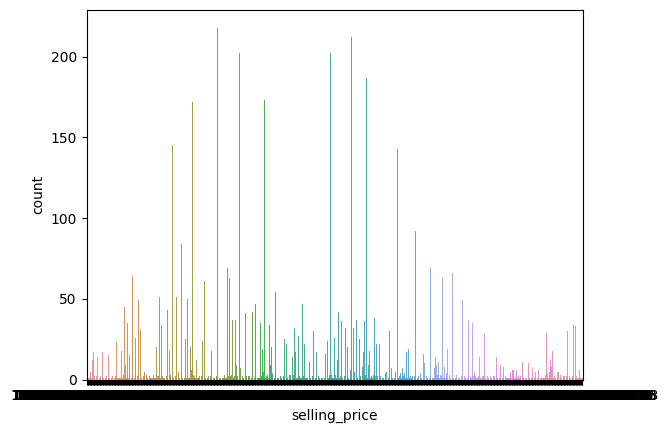

In [186]:
sns.countplot (data = df, x = 'selling_price')

<Axes: xlabel='fuel', ylabel='count'>

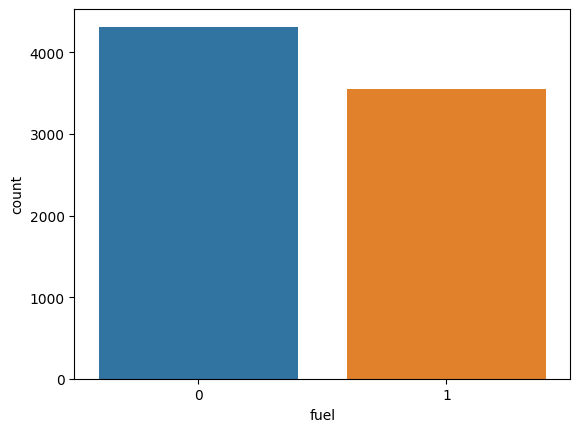

In [187]:
sns.countplot (data = df, x = 'fuel')

<Axes: xlabel='seller_type', ylabel='count'>

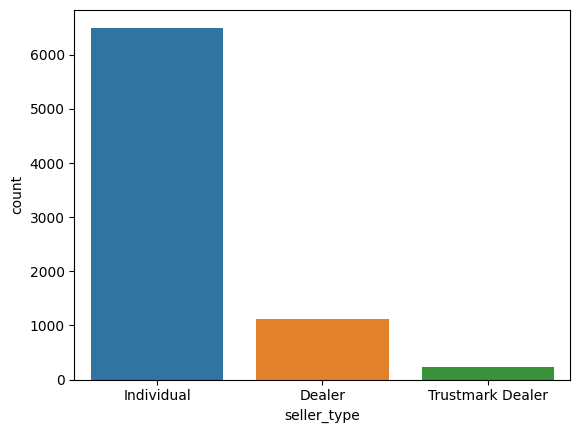

In [188]:
sns.countplot (data = df, x = 'seller_type')

<Axes: xlabel='transmission', ylabel='count'>

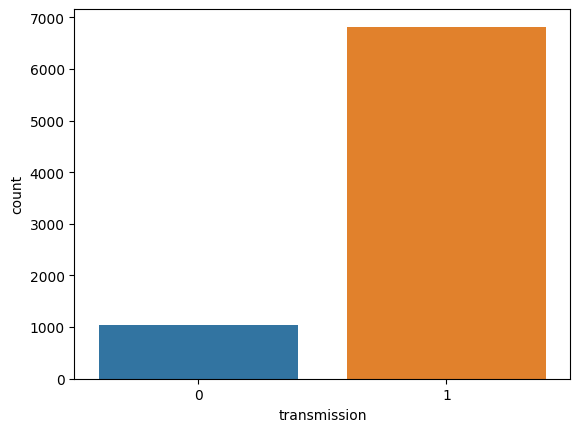

In [189]:
sns.countplot (data = df, x = 'transmission')

<Axes: xlabel='owner', ylabel='count'>

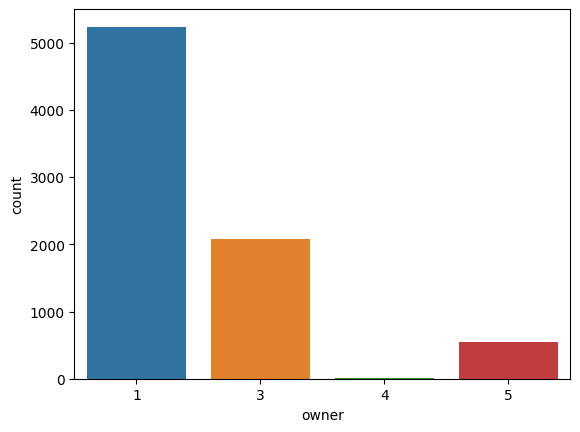

In [190]:
sns.countplot (data = df, x = 'owner')

<Axes: xlabel='seats', ylabel='count'>

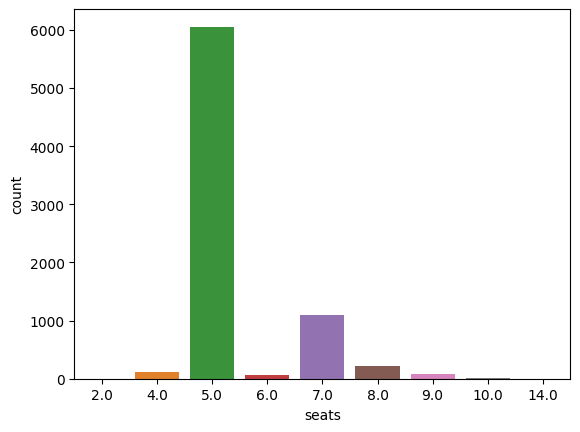

In [191]:
sns.countplot (data = df, x = 'seats')

<Axes: xlabel='brand', ylabel='count'>

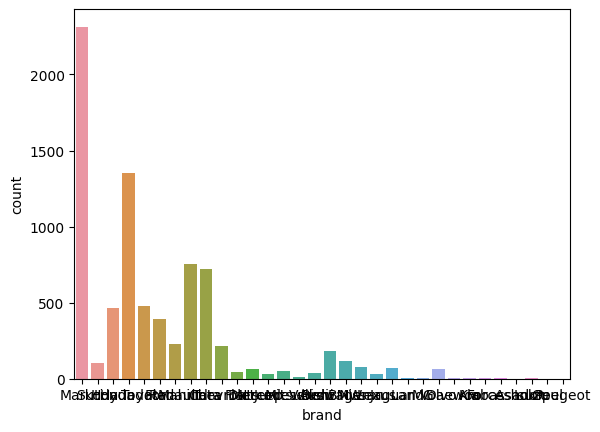

In [192]:
sns.countplot (data = df, x = 'brand')

<Axes: xlabel='year', ylabel='count'>

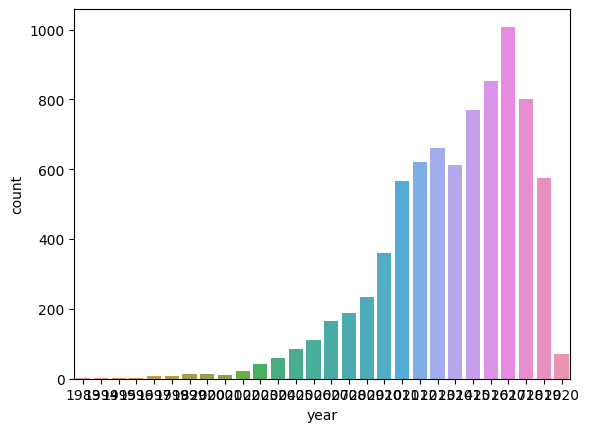

In [193]:
sns.countplot (data = df, x = 'year')

<h5>Distribution Plot</h5>

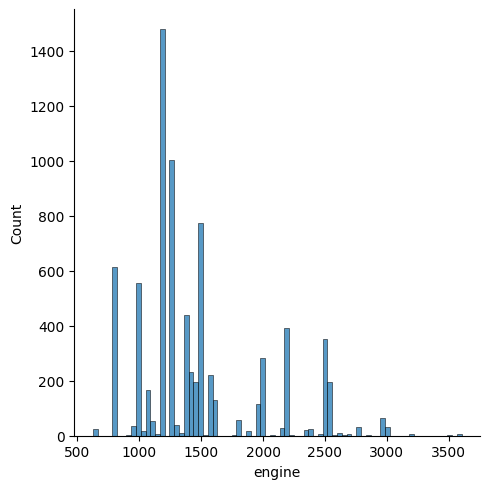

In [194]:
sns.displot(data = df, x = 'engine')

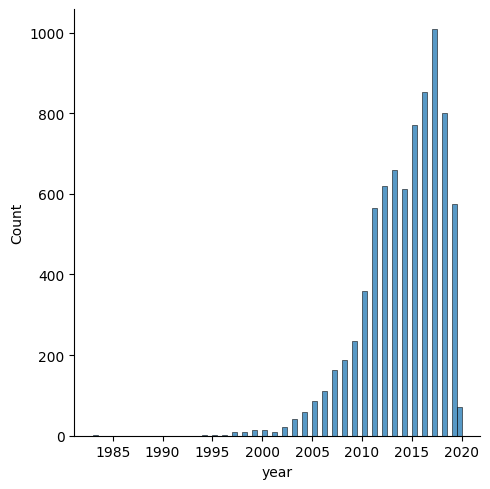

In [195]:
sns.displot(data = df, x = 'year')

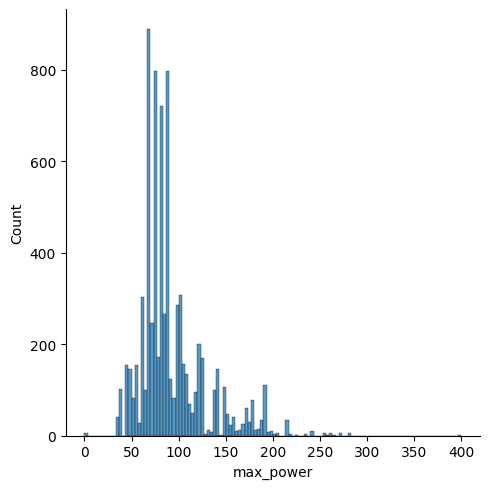

In [196]:
sns.displot(data = df, x = 'max_power')

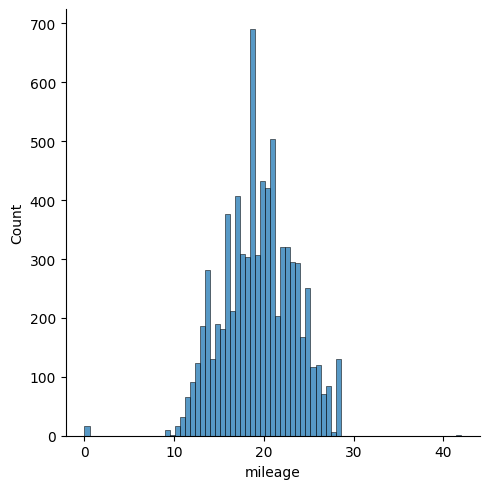

In [197]:
sns.displot(data = df, x = 'mileage')

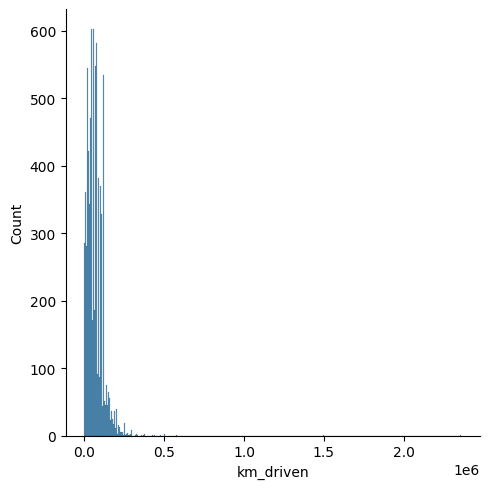

In [198]:
sns.displot(data = df, x = 'km_driven')

<h4>2.2 Multivariate analysis</h4>

Multiple variable exploratory data analysis

<h5>Boxplot</h5>

Text(0.5, 0, 'brand')

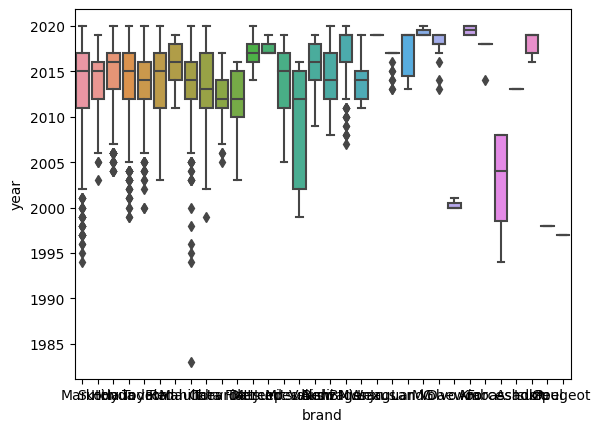

In [199]:
sns.boxplot (x = df['brand'], y = df['year']);
plt.ylabel("year")
plt.xlabel("brand")

Text(0, 0.5, 'Fuel')

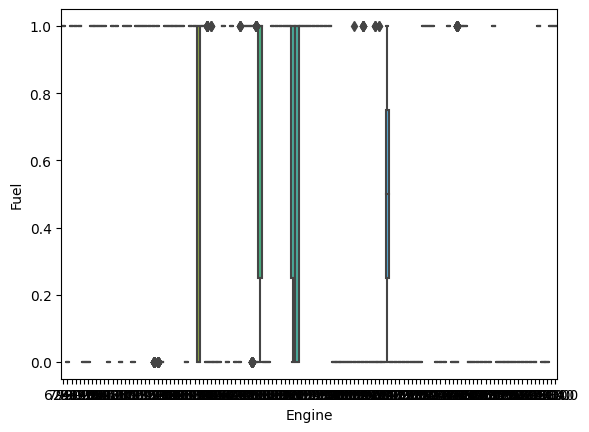

In [200]:
sns.boxplot (x = df['engine'], y = df['fuel']);
plt.xlabel("Engine")
plt.ylabel("Fuel")

Text(0, 0.5, 'selling price')

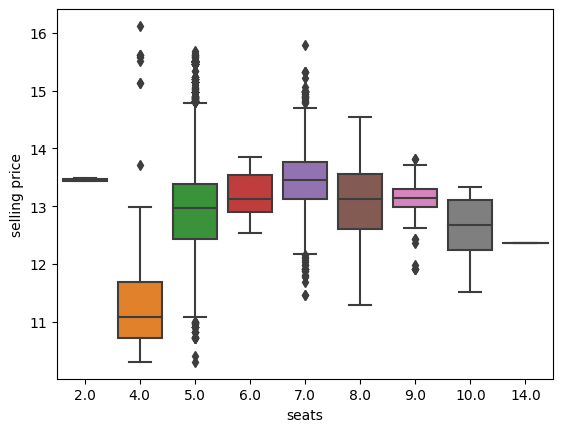

In [201]:
sns.boxplot (x = df['seats'], y = df['selling_price']);
plt.xlabel("seats")
plt.ylabel("selling price")

Text(0, 0.5, 'selling price')

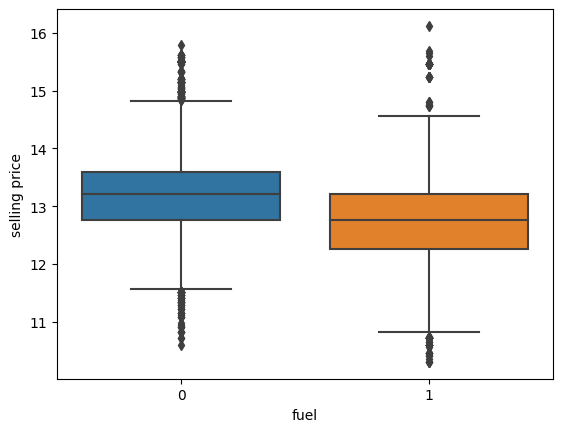

In [202]:
sns.boxplot (x = df['fuel'], y = df['selling_price']);
plt.xlabel("fuel")
plt.ylabel("selling price")

Text(0, 0.5, 'selling_price')

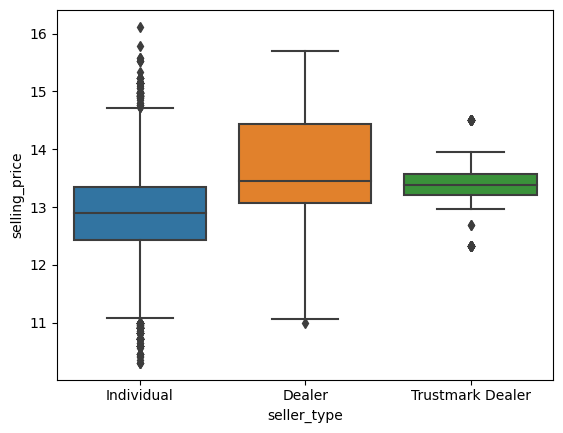

In [203]:
sns.boxplot (x = df['seller_type'], y = df['selling_price']);
plt.xlabel("seller_type")
plt.ylabel("selling_price")

<h5> Scatterplot </h5>

<Axes: xlabel='year', ylabel='selling_price'>

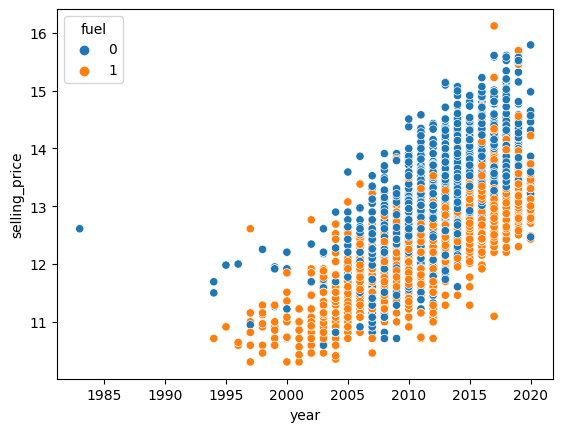

In [204]:
sns.scatterplot (x = df ['year'], y = df['selling_price'], hue = df['fuel'])
#diesel car are more expensive than petrol car

<Axes: xlabel='year', ylabel='selling_price'>

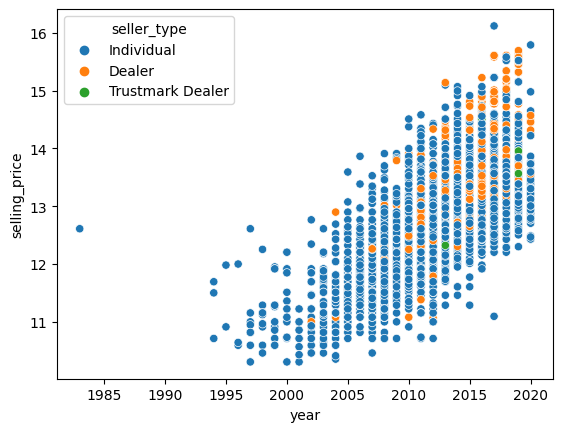

In [205]:
sns.scatterplot (x = df ['year'], y = df['selling_price'], hue = df['seller_type'])

<Axes: xlabel='year', ylabel='selling_price'>

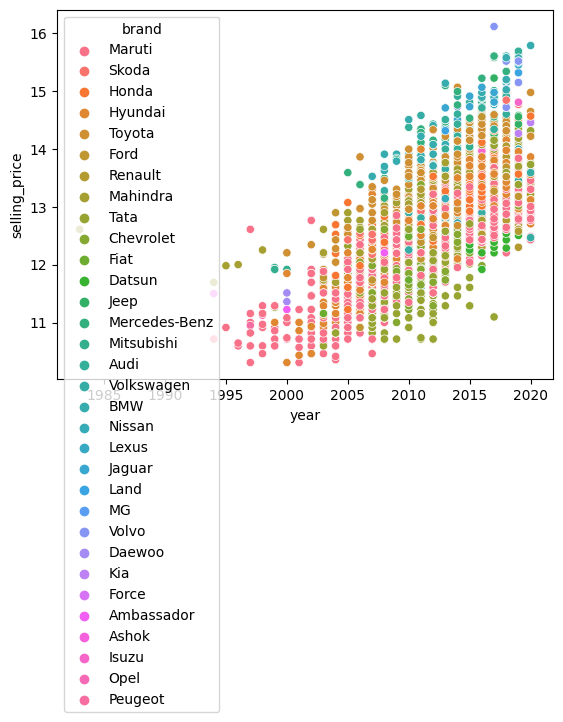

In [206]:
sns.scatterplot (x = df ['year'], y = df['selling_price'], hue = df['brand'])

<Axes: xlabel='year', ylabel='selling_price'>

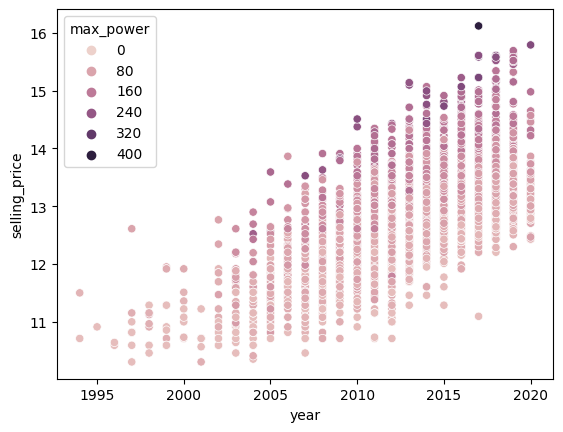

In [207]:
sns.scatterplot (x = df ['year'], y = df['selling_price'], hue = df['max_power'])

<Axes: xlabel='year', ylabel='selling_price'>

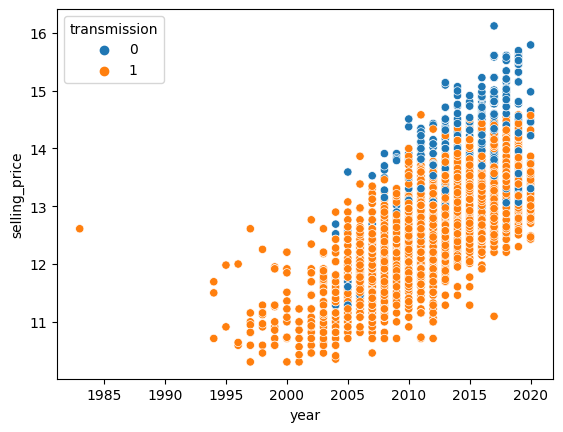

In [208]:
sns.scatterplot (x = df ['year'], y = df['selling_price'], hue = df['transmission'])

<Axes: xlabel='mileage', ylabel='selling_price'>

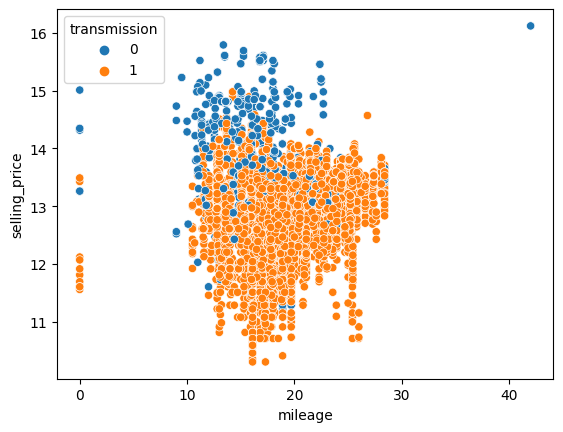

In [209]:
sns.scatterplot (x = df ['mileage'], y = df['selling_price'], hue = df['transmission'])

<Axes: xlabel='max_power', ylabel='selling_price'>

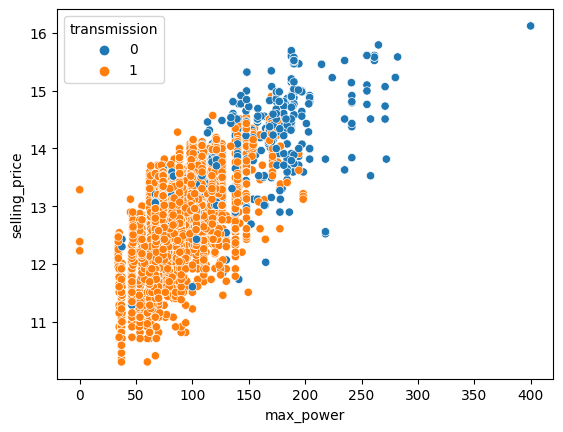

In [210]:
sns.scatterplot (x = df ['max_power'], y = df['selling_price'], hue = df['transmission'])

[Text(0, 0, 'Maruti'),
 Text(1, 0, 'Skoda'),
 Text(2, 0, 'Honda'),
 Text(3, 0, 'Hyundai'),
 Text(4, 0, 'Toyota'),
 Text(5, 0, 'Ford'),
 Text(6, 0, 'Renault'),
 Text(7, 0, 'Mahindra'),
 Text(8, 0, 'Tata'),
 Text(9, 0, 'Chevrolet'),
 Text(10, 0, 'Fiat'),
 Text(11, 0, 'Datsun'),
 Text(12, 0, 'Jeep'),
 Text(13, 0, 'Mercedes-Benz'),
 Text(14, 0, 'Mitsubishi'),
 Text(15, 0, 'Audi'),
 Text(16, 0, 'Volkswagen'),
 Text(17, 0, 'BMW'),
 Text(18, 0, 'Nissan'),
 Text(19, 0, 'Lexus'),
 Text(20, 0, 'Jaguar'),
 Text(21, 0, 'Land'),
 Text(22, 0, 'MG'),
 Text(23, 0, 'Volvo'),
 Text(24, 0, 'Daewoo'),
 Text(25, 0, 'Kia'),
 Text(26, 0, 'Force'),
 Text(27, 0, 'Ambassador'),
 Text(28, 0, 'Ashok'),
 Text(29, 0, 'Isuzu'),
 Text(30, 0, 'Opel'),
 Text(31, 0, 'Peugeot')]

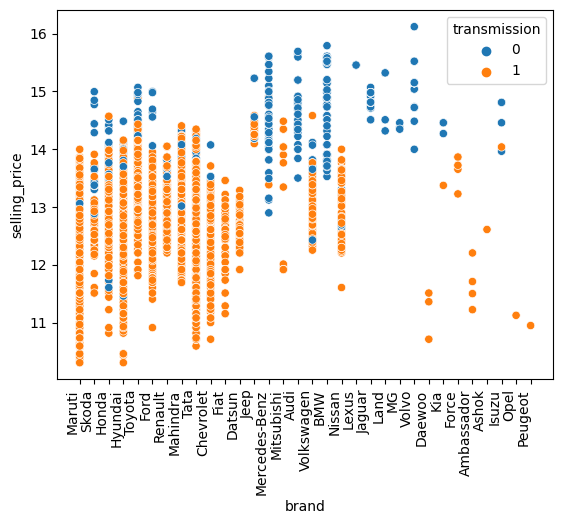

In [211]:
scatter_plot = sns.scatterplot (x = df ['brand'], y = df['selling_price'], hue = df['transmission'])
scatter_plot.set_xticklabels(scatter_plot.get_xticklabels(), rotation = 90, horizontalalignment = 'right')

<Axes: xlabel='mileage', ylabel='selling_price'>

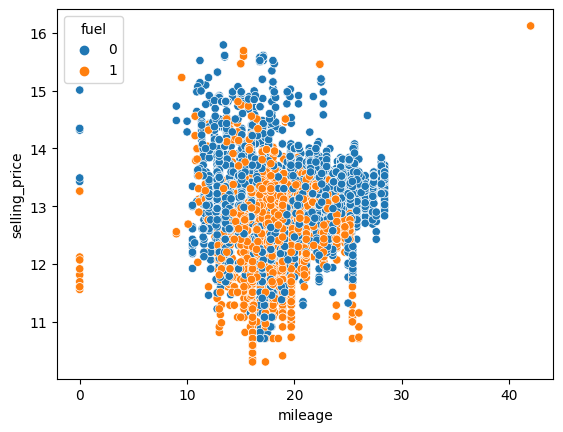

In [212]:
sns.scatterplot (x = df ['mileage'], y = df['selling_price'], hue = df['fuel'])

<Axes: xlabel='year', ylabel='selling_price'>

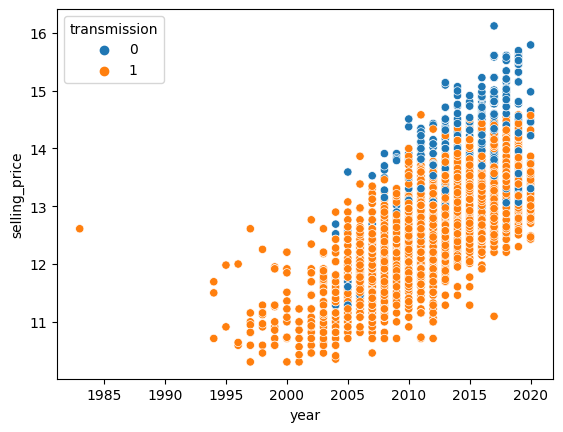

In [213]:
sns.scatterplot (x = df ['year'], y = df['selling_price'], hue = df['transmission'])

<Axes: xlabel='mileage', ylabel='selling_price'>

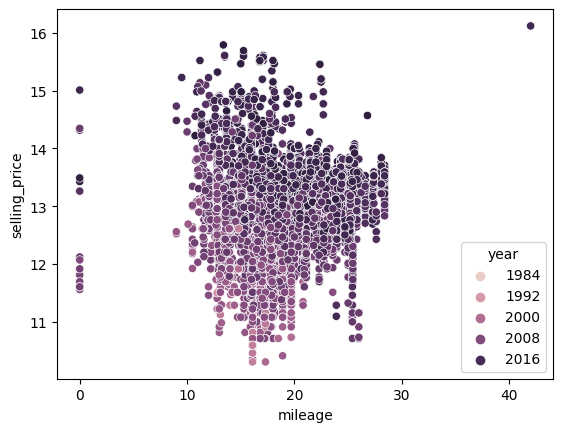

In [214]:
sns.scatterplot (x = df ['mileage'], y = df['selling_price'], hue = df['year'])

<Axes: xlabel='year', ylabel='selling_price'>

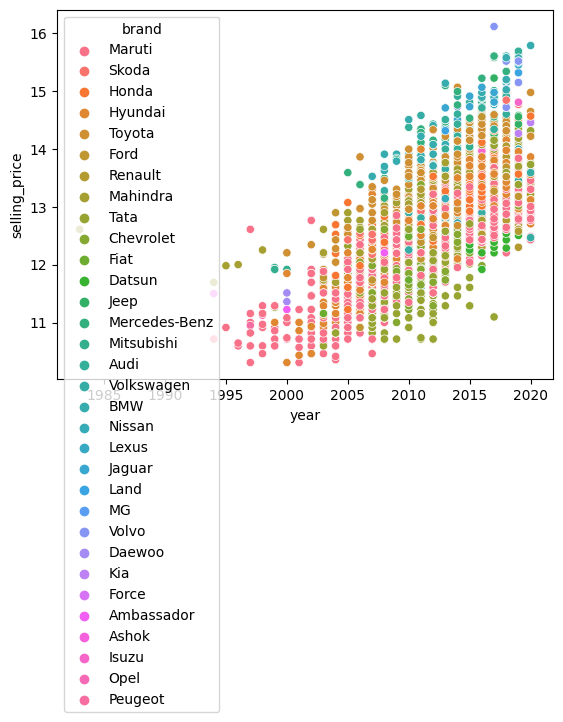

In [215]:
sns.scatterplot (x = df ['year'], y = df['selling_price'], hue = df['brand'])

<Axes: xlabel='mileage', ylabel='selling_price'>

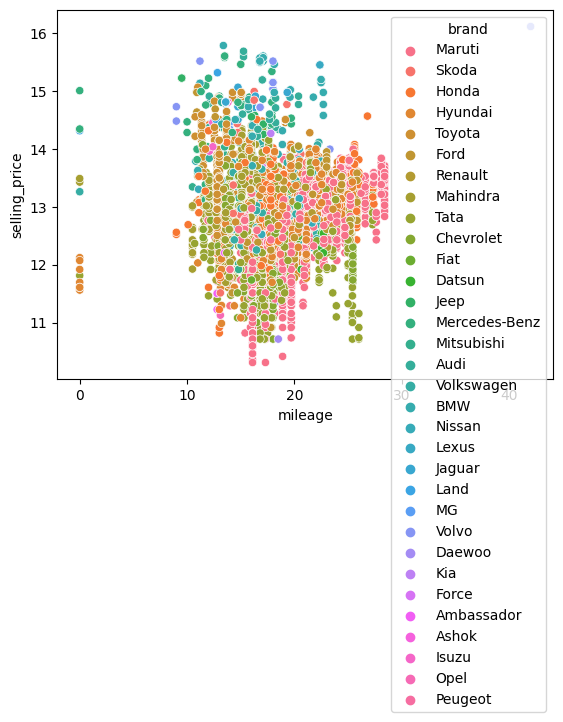

In [216]:
sns.scatterplot (x = df ['mileage'], y = df['selling_price'], hue = df['brand'])

In [217]:
df.dtypes

brand             object
year               int64
selling_price    float64
km_driven          int64
fuel               int64
seller_type       object
transmission       int64
owner              int64
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

In [218]:
df

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,13.017003,145500,0,Individual,1,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,12.821258,120000,0,Individual,1,3,21.14,1498.0,103.52,5.0
2,Honda,2006,11.970350,140000,1,Individual,1,5,17.70,1497.0,78.00,5.0
3,Hyundai,2010,12.323856,127000,0,Individual,1,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,11.775290,120000,1,Individual,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8122,Hyundai,2014,13.071070,80000,0,Individual,1,3,22.54,1396.0,88.73,5.0
8123,Hyundai,2013,12.676076,110000,1,Individual,1,1,18.50,1197.0,82.85,5.0
8125,Maruti,2009,12.853176,120000,0,Individual,1,1,19.30,1248.0,73.90,5.0
8126,Tata,2013,12.577636,25000,0,Individual,1,1,23.57,1396.0,70.00,5.0


<h5>Correlation Matrix</h5>

Correlation matrix is used to find strong factors predicting the life expectancy. It's also for checking features are too correlated.

<Axes: >

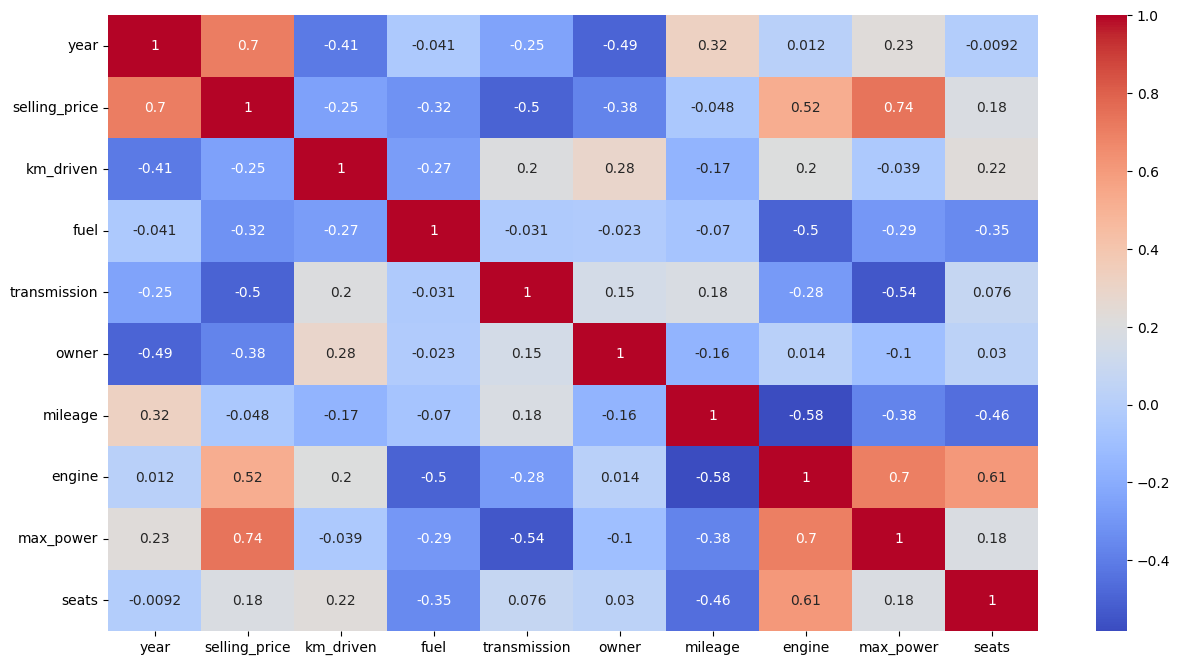

In [219]:
#Check out heatmap
plt.figure (figsize = (15,8))
# sns.heatmap (df.corr(), annot = True, cmap = 'coolwarm')
my_df = df.select_dtypes (exclude = [object])
sns.heatmap (my_df.corr(), annot = True, cmap = 'coolwarm')

In [220]:
my_df

,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
0,2014,13.017003,145500,0,1,1,23.40,1248.0,74.00,5.0
1,2014,12.821258,120000,0,1,3,21.14,1498.0,103.52,5.0
2,2006,11.970350,140000,1,1,5,17.70,1497.0,78.00,5.0
3,2010,12.323856,127000,0,1,1,23.00,1396.0,90.00,5.0
4,2007,11.775290,120000,1,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...
8122,2014,13.071070,80000,0,1,3,22.54,1396.0,88.73,5.0
8123,2013,12.676076,110000,1,1,1,18.50,1197.0,82.85,5.0
8125,2009,12.853176,120000,0,1,1,19.30,1248.0,73.90,5.0
8126,2013,12.577636,25000,0,1,1,23.57,1396.0,70.00,5.0


<h4>Predictive Power Score</h4>

In [221]:
import ppscore as pps

#before using pps

<Axes: xlabel='x', ylabel='y'>

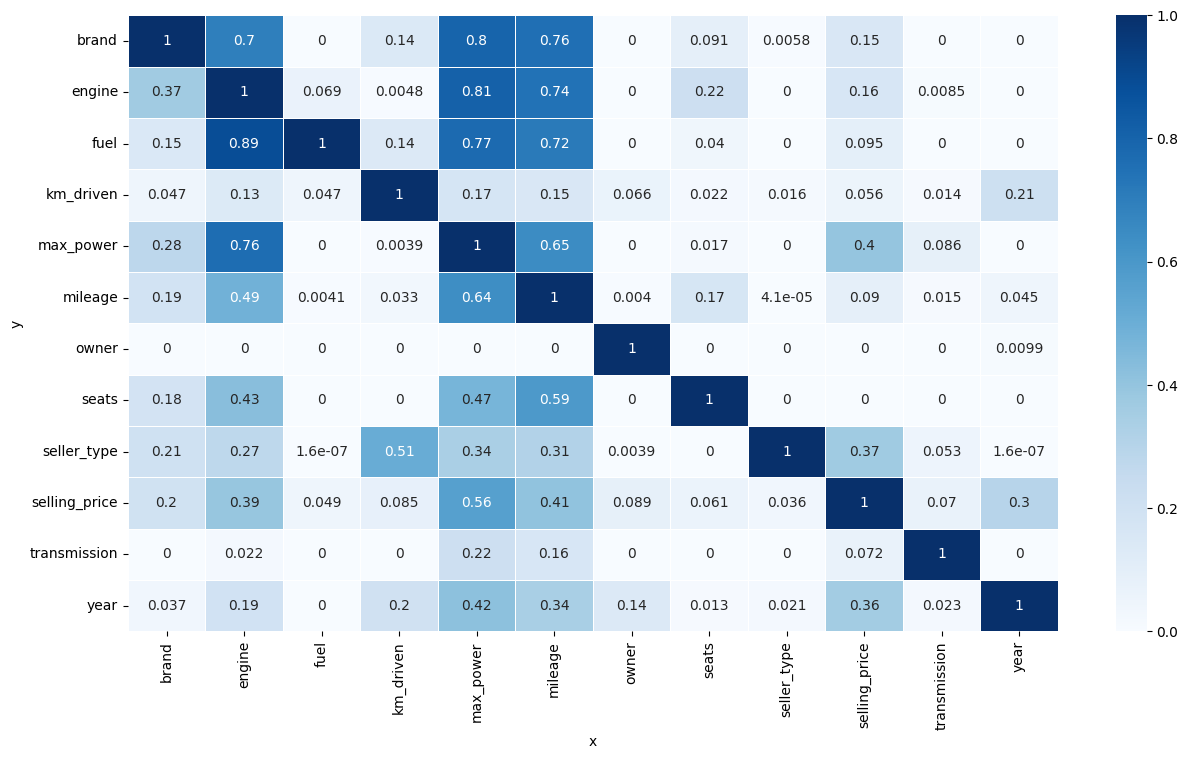

In [222]:
#ppscore_df = df.select_dtypes (exclude = [object])
matrix_df = pps.matrix(df)[['x','y','ppscore']].pivot (columns='x', index = 'y', values= 'ppscore')

#plot
plt.figure (figsize = (15,8))
sns.heatmap (matrix_df, vmin = 0, vmax = 1, cmap = "Blues", linewidths = 0.5, annot = True)

Do One Hot Encoding

In [223]:
# stop here

In [224]:
# # Perform one-hot encoding

# df = pd.get_dummies(df, columns=['brand'])
# df
df.reset_index(inplace=True)

In [225]:
from sklearn.preprocessing import OneHotEncoder

# Create function for one-hot encoding a feature in dataframe 
def one_hot_transform(encoder, dataframe, feature):

    encoded = encoder.transform(dataframe[[feature]])

    # Transform encoded data arrays into dataframe where columns are based values
    categories = encoder.categories_[0]
    feature_df = pd.DataFrame(encoded.toarray(), columns=categories[1:])
    concat_dataframe = pd.concat([dataframe, feature_df], axis=1)
    
    return concat_dataframe.drop(feature, axis=1)

In [226]:
# Since 'brand' and 'seller_type' have than two unique values, we should apply one-hot encoding
brand_ohe = OneHotEncoder(drop='first').fit(df[['brand']])
original_df = df.copy()
df = one_hot_transform(brand_ohe, df, 'brand')

In [227]:
brand_ohe.categories_

[array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
        'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
        'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
        'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
        'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
        'Volvo'], dtype=object)]

In [228]:
df.columns

Index(['index', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun', 'Fiat',
       'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Land', 'Lexus', 'MG', 'Mahindra', 'Maruti', 'Mercedes-Benz',
       'Mitsubishi', 'Nissan', 'Opel', 'Peugeot', 'Renault', 'Skoda', 'Tata',
       'Toyota', 'Volkswagen', 'Volvo'],
      dtype='object')

<Axes: xlabel='mileage', ylabel='selling_price'>

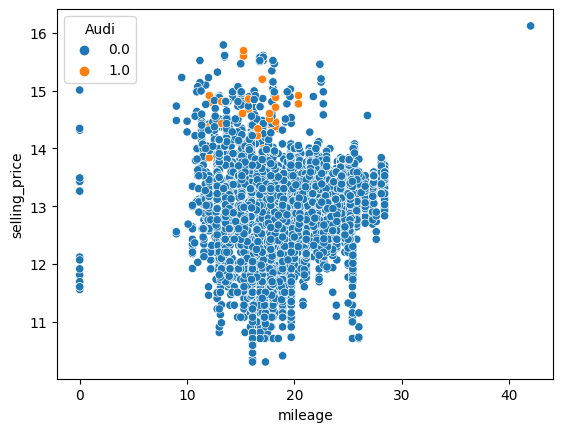

In [229]:
sns.scatterplot (x = df ['mileage'], y = df['selling_price'],hue = df['Audi'])

<Axes: xlabel='mileage', ylabel='selling_price'>

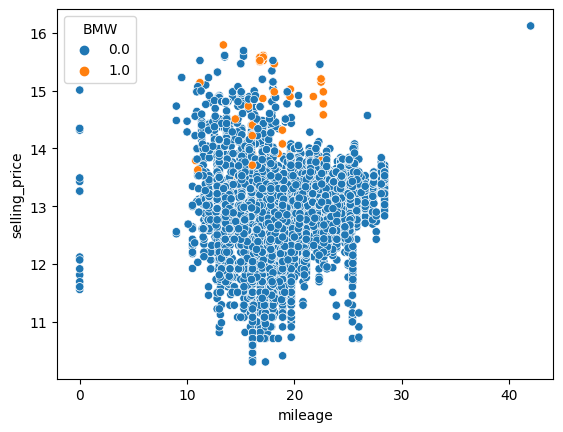

In [230]:
sns.scatterplot (x = df ['mileage'], y = df['selling_price'], hue = df['BMW'])

<Axes: xlabel='transmission', ylabel='selling_price'>

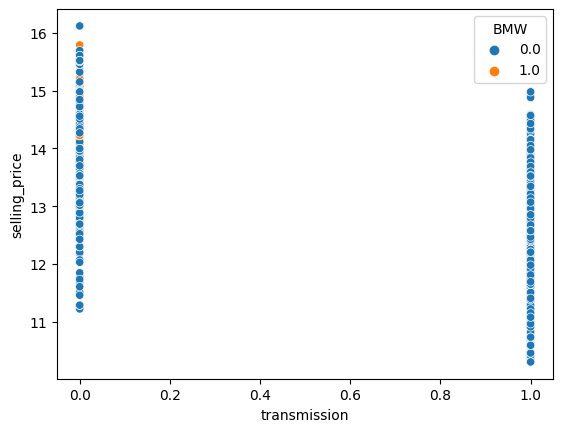

In [231]:
sns.scatterplot (x = df ['transmission'], y = df['selling_price'], hue = df['BMW'])

<h3>3. Feature Engineering</>

<h3>4. Feature Selection</h3>

In [232]:
df['selling_price']

0       13.017003
1       12.821258
2       11.970350
3       12.323856
4       11.775290
          ...    
7858    13.071070
7859    12.676076
7860    12.853176
7861    12.577636
7862    12.577636
Name: selling_price, Length: 7863, dtype: float64

In [233]:
# check the minimum value in 'selling price'
df['selling_price'].min()

10.308919326755392

In [234]:
# check the maximum value in 'selling price'
df['selling_price'].max()

16.11809565095832

In [235]:
# Define the bins and labels for price categories based on the log-transformed data
# Adjust the bin edges and labels to create four classes (0, 1, 2, 3)
bins = [10, 11.5, 12.5, 13.5, 16.12]  # Adjust the bin edges based on your data
labels = [0, 1, 2, 3]

# Use pd.cut to create the new categorical feature
df['price_category'],k_range = pd.qcut(df['selling_price'], q=4, labels=labels, retbins=True)

In [236]:
df['price_category']

0       1
1       1
2       0
3       0
4       0
       ..
7858    2
7859    1
7860    1
7861    1
7862    1
Name: price_category, Length: 7863, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [237]:
#check the different values for price_category 
df['price_category'].unique()

[1, 0, 2, 3]
Categories (4, int64): [0 < 1 < 2 < 3]

In [238]:
df['price_category'].value_counts()

1    1973
0    1968
3    1964
2    1958
Name: price_category, dtype: int64

In [239]:
# to parse the brand to train dataset
brand = ['brand_Ambassador', 'brand_Ashok', 'brand_Audi', 'brand_BMW',
       'brand_Chevrolet', 'brand_Daewoo', 'brand_Datsun', 'brand_Fiat',
       'brand_Force', 'brand_Ford', 'brand_Honda', 'brand_Hyundai',
       'brand_Isuzu', 'brand_Jaguar', 'brand_Jeep', 'brand_Kia', 'brand_Land',
       'brand_Lexus', 'brand_MG', 'brand_Mahindra', 'brand_Maruti',
       'brand_Mercedes-Benz', 'brand_Mitsubishi', 'brand_Nissan', 'brand_Opel',
       'brand_Peugeot', 'brand_Renault', 'brand_Skoda', 'brand_Tata',
       'brand_Toyota', 'brand_Volkswagen', 'brand_Volvo']
len(brand)

32

In [240]:
#x is strong features
# X = df[['mileage','year']+brand]
# 0.67
# X = df[['max_power','year']+brand]
brand_cats = list(brand_ohe.categories_[0][1:])
X = df[['max_power','year','fuel']+brand_cats]

#y is the selling_price label
y = df['price_category']

In [241]:
X

,max_power,year,fuel,Ashok,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,74.00,2014,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,103.52,2014,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,78.00,2006,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,90.00,2010,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,88.20,2007,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7858,88.73,2014,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7859,82.85,2013,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7860,73.90,2009,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7861,70.00,2013,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [242]:
y

0       1
1       1
2       0
3       0
4       0
       ..
7858    2
7859    1
7860    1
7861    1
7862    1
Name: price_category, Length: 7863, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]


<h5>Train Test Split</h5>

In [243]:
# train 70% and test 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 16)

<h4>Preprocessing</h4>

<h5>Null Values</h5>

In [244]:
#check for null vaules in train set
X_train.isna().sum()

max_power        138
year               0
fuel               0
Ashok              0
Audi               0
BMW                0
Chevrolet          0
Daewoo             0
Datsun             0
Fiat               0
Force              0
Ford               0
Honda              0
Hyundai            0
Isuzu              0
Jaguar             0
Jeep               0
Kia                0
Land               0
Lexus              0
MG                 0
Mahindra           0
Maruti             0
Mercedes-Benz      0
Mitsubishi         0
Nissan             0
Opel               0
Peugeot            0
Renault            0
Skoda              0
Tata               0
Toyota             0
Volkswagen         0
Volvo              0
dtype: int64

In [245]:
#check for null values in test set
X_test.isna().sum()


max_power        58
year              0
fuel              0
Ashok             0
Audi              0
BMW               0
Chevrolet         0
Daewoo            0
Datsun            0
Fiat              0
Force             0
Ford              0
Honda             0
Hyundai           0
Isuzu             0
Jaguar            0
Jeep              0
Kia               0
Land              0
Lexus             0
MG                0
Mahindra          0
Maruti            0
Mercedes-Benz     0
Mitsubishi        0
Nissan            0
Opel              0
Peugeot           0
Renault           0
Skoda             0
Tata              0
Toyota            0
Volkswagen        0
Volvo             0
dtype: int64

In [246]:
y_train.isna().sum()

0

In [247]:
y_test.isna().sum()

0

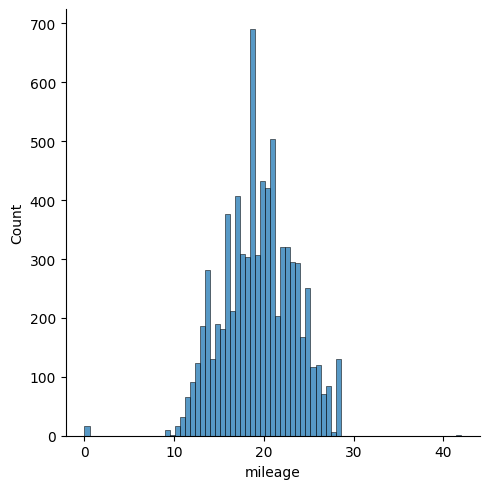

In [248]:
sns.displot(data = df, x = 'mileage')

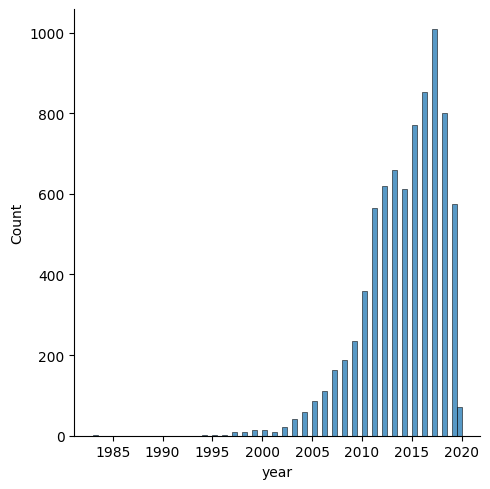

In [249]:
sns.displot(data = df, x = 'year')

In [250]:
brand_s = pd.Series(brand)
brand_s

0        brand_Ambassador
1             brand_Ashok
2              brand_Audi
3               brand_BMW
4         brand_Chevrolet
5            brand_Daewoo
6            brand_Datsun
7              brand_Fiat
8             brand_Force
9              brand_Ford
10            brand_Honda
11          brand_Hyundai
12            brand_Isuzu
13           brand_Jaguar
14             brand_Jeep
15              brand_Kia
16             brand_Land
17            brand_Lexus
18               brand_MG
19         brand_Mahindra
20           brand_Maruti
21    brand_Mercedes-Benz
22       brand_Mitsubishi
23           brand_Nissan
24             brand_Opel
25          brand_Peugeot
26          brand_Renault
27            brand_Skoda
28             brand_Tata
29           brand_Toyota
30       brand_Volkswagen
31            brand_Volvo
dtype: object

In [251]:
# sns.barplot(data = df, x = 'brand', y = 'selling_price')

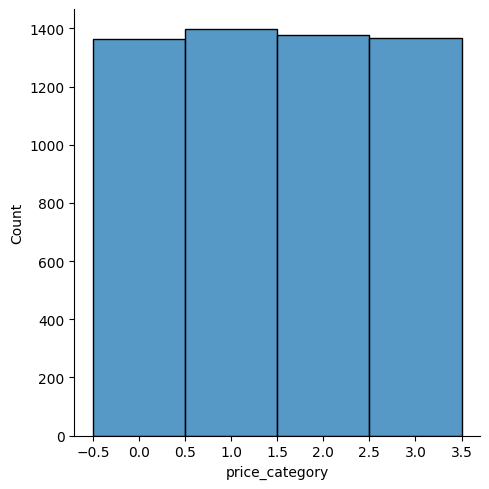

In [252]:
sns.displot(y_train)

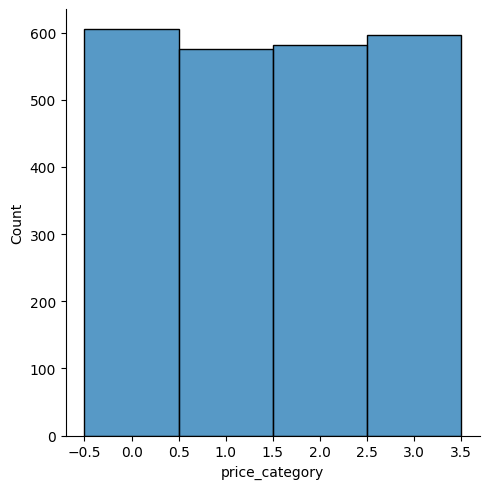

In [253]:
sns.displot(y_test)

In [254]:
#After checking the null values for my features: 'transmission' and 'max_power', only 'max_power' feature has the null values.
# for the max_power, I will fill with median value 
#syntax df.fillna (value = none, method=none, axis = none, inplace = false, limit = none, downcase = none)

# X_train['mileage'].fillna(X_train['mileage'].median(),inplace = True)
# X_test['mileage'].fillna(X_train['mileage'].median(),inplace = True)

X_train['max_power'].fillna(X_train['max_power'].median(),inplace = True)
X_test['max_power'].fillna(X_train['max_power'].median(),inplace = True)

# X_train['transmission'].fillna(X_train['transmission'].median(),inplace = True)
# X_test['transmission'].fillna(X_train['transmission'].median(),inplace = True)

#for our label that is selling_price, there is no null value.

In [255]:
#check
X_train.isna().sum()

max_power        0
year             0
fuel             0
Ashok            0
Audi             0
BMW              0
Chevrolet        0
Daewoo           0
Datsun           0
Fiat             0
Force            0
Ford             0
Honda            0
Hyundai          0
Isuzu            0
Jaguar           0
Jeep             0
Kia              0
Land             0
Lexus            0
MG               0
Mahindra         0
Maruti           0
Mercedes-Benz    0
Mitsubishi       0
Nissan           0
Opel             0
Peugeot          0
Renault          0
Skoda            0
Tata             0
Toyota           0
Volkswagen       0
Volvo            0
dtype: int64

In [256]:
#check
X_test.isna().sum()

max_power        0
year             0
fuel             0
Ashok            0
Audi             0
BMW              0
Chevrolet        0
Daewoo           0
Datsun           0
Fiat             0
Force            0
Ford             0
Honda            0
Hyundai          0
Isuzu            0
Jaguar           0
Jeep             0
Kia              0
Land             0
Lexus            0
MG               0
Mahindra         0
Maruti           0
Mercedes-Benz    0
Mitsubishi       0
Nissan           0
Opel             0
Peugeot          0
Renault          0
Skoda            0
Tata             0
Toyota           0
Volkswagen       0
Volvo            0
dtype: int64

<h5>Checking Outliers</h5>

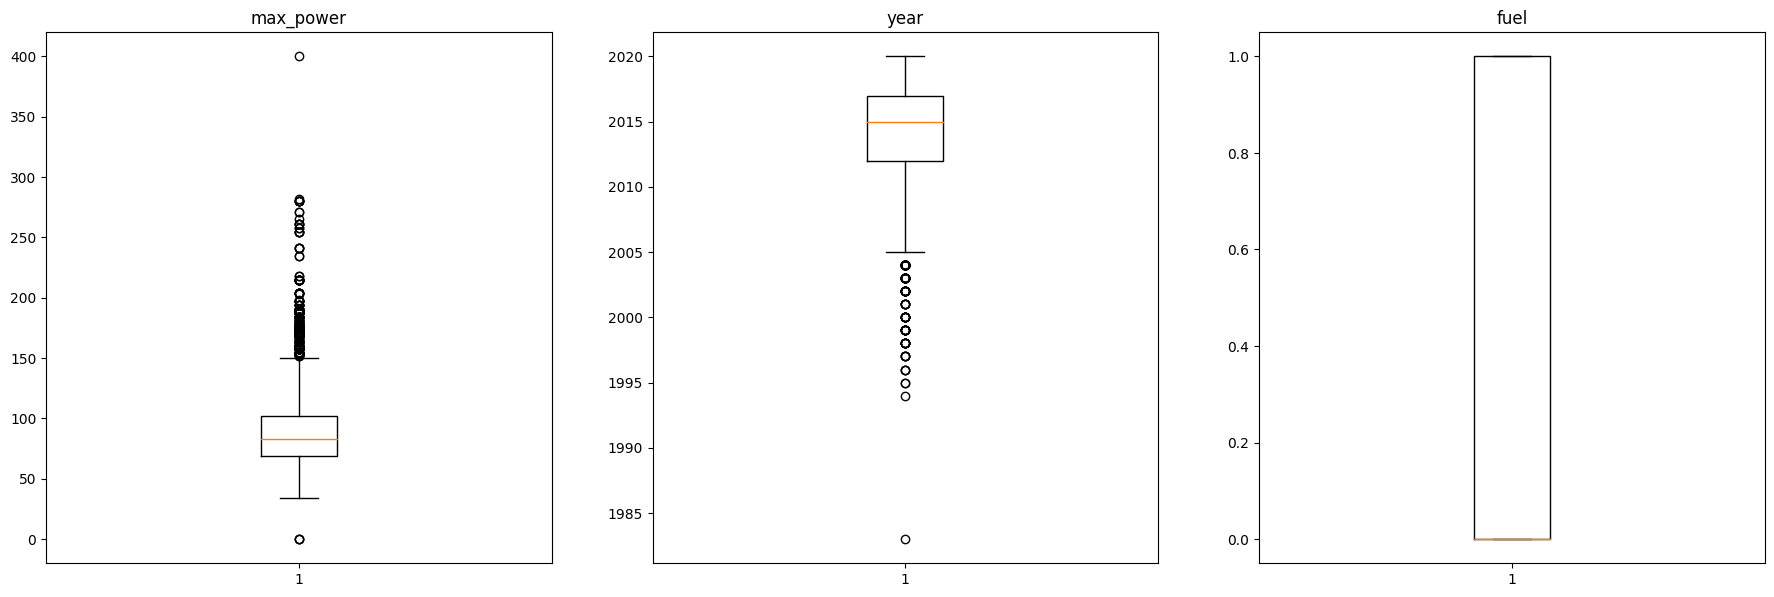

In [257]:
#Create a dictionary of columns
# col_dict = {'mileage':2, 'year':3}
# col_dict = {'max_power':2, 'year':3}
col_dict = {'max_power':2, 'year':3, 'fuel':4}

#detect outliers in each variable using box plots
plt.figure(figsize=(30,40))

for variable,i in col_dict.items():
    plt.subplot(5,4,i)
    plt.boxplot(X_train[variable])
    
    plt.title(variable)
plt.show()
    

In [258]:
def outlier_count(col, data = X_train):
    
    #calculate 25% quatile and 75% quatile
    q75, q25 = np.percentile (data[col],[75,25])
    
    
    #calculate your inter quatile
    iqr = q75-q25
    
    #min_val and max_val
    min_val = q25 - (iqr * 1.5)
    max_val = q75 + (iqr * 1.5)
    
    #count number of outliers, which are the data that are less than min_val and more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    #calculate the percentage of the outliers
    outlier_percent = round (outlier_count/len(data[col])*100,2)
    
    if(outlier_count > 0):
        print("\n" + 15*"-" + col + 15*'-' + "\n")
        print ('Number of outliers: {}'.format (outlier_count))
        print ('Percentage of data that is outlier : {}'.format(outlier_percent))

In [259]:
for col in X_train.columns:
    outlier_count(col)


---------------max_power---------------

Number of outliers: 403
Percentage of data that is outlier : 7.32

---------------year---------------

Number of outliers: 138
Percentage of data that is outlier : 2.51

---------------Ashok---------------

Number of outliers: 1
Percentage of data that is outlier : 0.02

---------------Audi---------------

Number of outliers: 25
Percentage of data that is outlier : 0.45

---------------BMW---------------

Number of outliers: 83
Percentage of data that is outlier : 1.51

---------------Chevrolet---------------

Number of outliers: 157
Percentage of data that is outlier : 2.85

---------------Daewoo---------------

Number of outliers: 3
Percentage of data that is outlier : 0.05

---------------Datsun---------------

Number of outliers: 49
Percentage of data that is outlier : 0.89

---------------Fiat---------------

Number of outliers: 32
Percentage of data that is outlier : 0.58

---------------Force---------------

Number of outliers: 3
Percent

<h3>Scaling </h3>

In [296]:
from sklearn.preprocessing import StandardScaler

#feature scaling helps improve reach convergence faster
scaler = StandardScaler()

# Specify the columns you want to scale
# columns_to_scale = ['year', 'mileage']
columns_to_scale = ['max_power','year']
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform (X_test[columns_to_scale])

In [261]:
#check the shape of all X_train, y_train, y_test
print ("Shape of X_train: ", X_train.shape)
print ("Shape of X_test: ", X_test.shape)
print ("Shape of y_train: ", y_train.shape)
print ("Shape of y_test: ", y_test.shape)


Shape of X_train:  (5504, 34)
Shape of X_test:  (2359, 34)
Shape of y_train:  (5504,)
Shape of y_test:  (2359,)


<h3> Modelling </h3>

<h4> ML Flow </h4>

In [262]:
#experiment tracking
import mlflow
import os
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer. 'Set Tracking URI'
mlflow.set_tracking_uri("https://mlflow.cs.ait.ac.th/")
# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
os.environ["LOGNAME"] = "kyithinnu"
# mlflow.create_experiment(name="kyi-a3")  #create if you haven't create
mlflow.set_experiment(experiment_name = "st124087-a3")

<Experiment: artifact_location='mlflow-artifacts:/632071439615667481', creation_time=1696084817076, experiment_id='632071439615667481', last_update_time=1696084817076, lifecycle_stage='active', name='st124087-a3', tags={}>

<h1> to check where our matrixs are correct </h1>

In [263]:
# make sure our y is in the shape of (m, k)
# we will convert our output vector in 
# matrix where no. of columns is equal to the no. of classes. 
# The values in the matrix will be 0 or 1. For instance the rows 
# where we have output 2 the column 2 will contain 1 and the rest are all 0.
# in simple words, y will be of shape (m, k)
k = len(set(y))  # no. of class  (can also use np.unique)
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features
Y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_train==each_class
    Y_train_encoded[np.where(cond), each_class] = 1

In [264]:
X_train.shape

(5504, 34)

<h1> Algo : Logistic Regression </h1>

In [265]:
class LogisticRegression:
    
    def __init__(self, regularization, k, n, method, alpha = 0.001, use_momentum = True, momentum=0.5, theta = 'zeros', max_iter=5000):
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
        self.regularization = regularization
        self.use_momentum = use_momentum
        self.momentum = momentum
        self.W = theta
    
    def fit(self, X, Y):
        # --- choose theta between zeros initialization or xavier ---
        # set theta by xavier method
        if self.W == 'xavier':
            # for xavier weight initialization
            m = X.shape[0]    # define number of samples according to the train dataset
            print(f"number of sample:{m}")
            
            # calculate the range for the weights
            lower , upper = -(1.0 / np.sqrt(m)), (1.0 / np.sqrt(m))
            # summarize the range
            print(lower , upper)
            
            # randomly pick weights within this range
            numbers = np.random.rand(X.shape[1],self.k)     # generate random numbers according to the number of selected features
            scaled = lower + numbers * (upper - lower)
            print(scaled)
            self.W = scaled
            
        # set theta by zeros
        else :
            self.W = np.random.rand(self.n, self.k)
        
        self.losses = []
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss) #loss
                self.W = self.W - self.alpha * grad #update theta
                # if i % 500 == 0:
                #     print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                # if i % 500 == 0:
                #     print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                
                # print('Sto')
                # print(X.values[idx])
                
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                # if i % 500 == 0:
                #     print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')   
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        
        loss = ( - np.sum(Y*np.log(h)) / m)

        error = h - Y
        grad = self.softmax_grad(X, error) + self.regularization.derivation(self.W)
        return loss, grad
    
    def softmax(self, theta_t_x):
        exp_theta_t_x = np.exp(theta_t_x)
        if isinstance(exp_theta_t_x, np.ndarray):
            return exp_theta_t_x / np.sum(exp_theta_t_x, axis=1, keepdims=True)
        else:
        # Convert to numpy array if it's not already
            exp_theta_t_x = np.array(exp_theta_t_x)
            return exp_theta_t_x / np.sum(exp_theta_t_x, axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()
        
    # accuracy classes
    def scratch_accuracy(self, y_pred, y_true):
        # Calculate and return the accuracy
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    def scratch_classification_report(self, y_true, y_pred):
        # Get unique class labels
        unique_labels = np.unique(y_true)
        
        # Initialize variables to store results
        precision = []
        recall = []
        f1_score = []
        
        for label in unique_labels:
            # True positives, false positives, and false negatives for the current label
            tp = np.sum((y_true == label) & (y_pred == label))
            fp = np.sum((y_true != label) & (y_pred == label))
            fn = np.sum((y_true == label) & (y_pred != label))
            
            # Precision, Recall, and F1-score for the current label
            label_precision = tp / (tp + fp)
            label_recall = tp / (tp + fn)
            label_f1_score = 2 * (label_precision * label_recall) / (label_precision + label_recall)
            
            precision.append(label_precision)
            recall.append(label_recall)
            f1_score.append(label_f1_score)
        
        # Create a dictionary to store the classification report
        report = {
            "precision": precision,
            "recall": recall,
            "f1_score": f1_score
        }
        return report

    # macro precision
    def macro_precision (self, precision):
        macroPrecision = sum(precision)/len(precision)
        return macroPrecision

    # macro recall
    def macro_recall (self, recall):
        macroRecall = sum(recall)/len(recall)
        return macroRecall

    # macro f1
    def macro_f1 (self, f1):
        macrof1 = sum(f1)/len(f1)
        return macrof1

    # weighted precision
    def weighted_precision (self, y, precision):
        weightedPrecision = y.value_counts() @ precision / y.shape[0]
        return weightedPrecision    

    # weighted recall
    def weighted_recall (self, y, recall):
        weightedRecall = y.value_counts() @ recall / y.shape[0]
        return weightedRecall

    # weighted f1
    def weighted_f1 (self, y, f1) :
        weightedf1 = y.value_counts() @ f1 / y.shape[0]
        return weightedf1
        

<h4> Ridge and Normal Regression </h4>

In [266]:
# ridge regression
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
class Ridge(LogisticRegression):
    
    def __init__(self, k, n, method, alpha, use_momentum, momentum, theta, l = 0.01):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, k, n, method, alpha, use_momentum, momentum, theta)

# normal regression
class NormalPenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return 0
        
    def derivation(self, theta):
        return 0
    
class Normal_LogisticRegression(LogisticRegression):
    
    def __init__(self, k, n, method, alpha = 0.01, use_momentum = True, momentum = 0.5, theta = 'zeros', l = 0.01):
        self.regularization = NormalPenalty(l)
        super().__init__(self.regularization, k, n, method, alpha, use_momentum, momentum, theta)

In [267]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [268]:
type(Y_train_encoded)

numpy.ndarray

In [269]:
# model = Normal_LogisticRegression(k, X_train.shape[1], "minibatch")
# # model_Ridge = Ridge(k, X_train.shape[1], "minibatch")
# model.fit(X_train, Y_train_encoded)
# yhat = model.predict(X_test)
# model.plot()
# print(" ")
# print("=========Scratch Classification Report=======")
# # Accuracy Report
# print("Accuracy Report: ", model.scratch_accuracy(y_test, yhat))

# report = model.scratch_classification_report(y_test,yhat)
# # Precision Report
# print("Precision Report: ", report['precision'])
# # Recall Report
# print("Recall Report: ", report['recall'])
# # F1 Score Report
# print("F1 Score Report: ", report['f1_score'])
# print(" ")
# # weighted report
# print("==Weighted Report==")
# print("Weighted Precision Report: ", model.weighted_precision(pd.Series(yhat), report['precision']))
# print("Weighted Recall Report: ", model.weighted_recall(pd.Series(yhat), report['recall']))
# print("Weighted F1_Score Report: ", model.weighted_f1(pd.Series(yhat), report['f1_score']))
# print(" ")
# # macro report
# print("==Macro Report==")
# print("Macro Precision Report: ", model.macro_precision(report['precision']))
# print("Macro Recall Report: ", model.macro_recall(report['recall']))
# print("Macro F1_Score Report: ", model.macro_f1(report['f1_score']))
# print(" ")

# # Accuracy Report with Sklearn Model 
# print("=========Scikit Learn Classification Report=======")
# print("Report: ", classification_report(y_test, yhat))
# print("support : indicate the total number of samples")


In [279]:
X_train

,max_power,year,fuel,Ashok,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
7187,-0.284600,1.021301,1.100604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3539,-0.728471,-1.253073,1.100604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55,2.319765,-0.242240,-0.908592,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4653,-0.090265,1.021301,-0.908592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5070,-1.626917,0.010468,1.100604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,-0.091110,0.515885,-0.908592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581,0.186873,-0.242240,-0.908592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2169,-0.618630,-2.769323,1.100604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7406,-1.257963,1.021301,1.100604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h3> Experiment </h3>

In [129]:
mlflow.end_run()

{'k': 4, 'n': 34, 'method': 'sto', 'alpha': 0.01, 'use_momentum': True, 'momentum': 0.9, 'theta': 'zeros', 'l': 0.1}
===== Normal_LogisticRegression =====
method:  sto
alpha:  0.01
use_momentum: True
momentum:  0.9
theta: zeros
 
time taken: 0.13926911354064941
 
=========Scratch Classification Report=======
Accuracy Report:  0.6769817719372615
=========Scikit Learn Classification Report=======
Report:                precision    recall  f1-score   support

           0       0.74      0.89      0.81       605
           1       0.59      0.40      0.48       576
           2       0.59      0.55      0.57       582
           3       0.73      0.85      0.79       596

    accuracy                           0.68      2359
   macro avg       0.66      0.67      0.66      2359
weighted avg       0.66      0.68      0.66      2359

support : indicate the total number of samples
{'k': 4, 'n': 34, 'method': 'sto', 'alpha': 0.001, 'use_momentum': True, 'momentum': 0.9, 'theta': 'zeros', 'l'

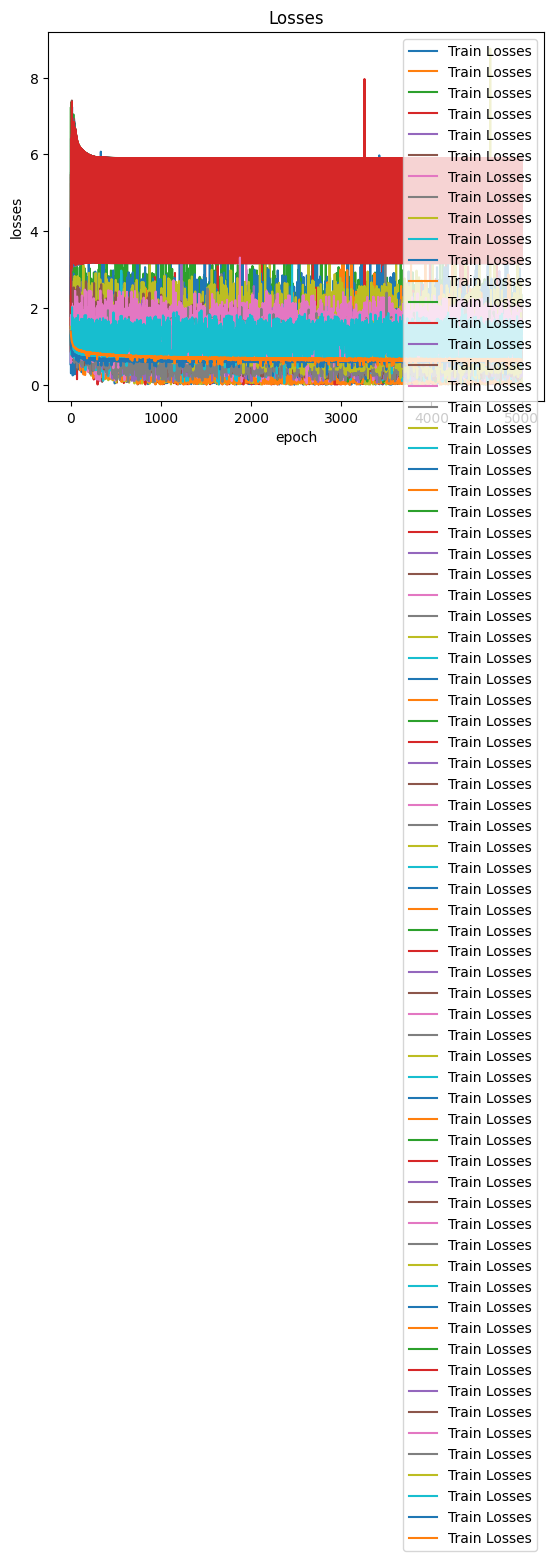

In [270]:
# Define Regularization Method: Normal, Ridge
regs = ['Normal_LogisticRegression', 'Ridge']

# Define Momentum
use_momentums = ['True', 'False']

# Define method
methods = ['sto', 'batch', 'minibatch']

# Define theta
thetas = ['zeros', 'xavier']

# Define learning rate
lrs = [0.01, 0.001, 0.0001]

# Hyperparameter combination for expirement
hyperparameter_combinations = []

for use_momentum in use_momentums:
    for method in methods:
        for theta in thetas:
            for alpha in lrs:
                params = {
                    "k" : k,
                    "n" : X_train.shape[1],
                    "method": method,
                    "alpha": alpha,
                    "use_momentum": use_momentum == "True",
                    "momentum": 0.9,
                    "theta": theta,
                    "l": 0.1
                }

                hyperparameter_combinations.append(params)
                
# Loop through hyperparameter combinations
for reg in regs:
    mlflow.start_run(run_name=f"regression-{reg}")
    # string to class
    # mlflow.log_
    type_of_regression = str_to_class(reg)
    
    for params in hyperparameter_combinations:
        print(params) # check params
        
        # log parameter to mlflow
        with mlflow.start_run(run_name=f"regression-{reg}-method-{params['method']}-alpha-{params['alpha']}-theta-{params['theta']}-use_momentum-{params['use_momentum']}-momentum-{params['momentum']}", nested=True):
            mlflow.log_params(params=params)
            
            print("=" * 5, reg, "=" * 5)
            print("method: ", params['method'])
            print("alpha: ", params['alpha'])
            print("use_momentum:", params['use_momentum'])
            print("momentum: ",params['momentum'])
            print("theta:", params['theta'])
            print(" ")
            
            # train model
            if reg == 'Normal_LogisticRegression':
                model = Normal_LogisticRegression(**params)
                # model.fit(X_train.values, Y_train_encoded)
            else:
                model = Ridge(**params)
                
            model.fit(X_train.values, Y_train_encoded)
            
            # predict 
            yhat = model.predict(X_test)
            model.plot()
            
            print(" ")
            print("=========Scratch Classification Report=======")
            
            # Accuracy Report
            accuracy_report = model.scratch_accuracy(y_test, yhat)
            print("Accuracy Report: ", accuracy_report)
            mlflow.log_metric(key = "accuracy_report", value = accuracy_report)
            
            # classification_report: precision, recall, f1
            report = model.scratch_classification_report(y_test,yhat)
            
            # Precision Report
            precision_report = report['precision']
            # print("Precision Report: ", report['precision'])
            #log precision report to mlflow : for each class
            # mlflow.log_metric(key = "precision_report", value = precision_report) 
            
            # Recall Report
            recall_report = report['recall']
            # print("Recall Report: ", report['recall'])
            #log recall report to mlflow : for each class
            # mlflow.log_metric(key = "recall_report", value = recall_report)
            
            # F1 Score Report
            f1_score_report = report['f1_score']
            # print("F1 Score Report: ", report['f1_score'])
            
            #log f1_score report to mlflow : for each class
            # mlflow.log_metric(key = "f1_score_report", value = f1_score_report)
            # print(" ")
            
            # weighted report
            # print("==Weighted Report==")
            weighted_precision = model.weighted_precision(pd.Series(yhat), report['precision'])
            weighted_recall = model.weighted_recall(pd.Series(yhat), report['recall'])
            weighted_f1_score = model.weighted_f1(pd.Series(yhat), report['f1_score'])
            # print("Weighted Precision Report: ", model.weighted_precision(pd.Series(yhat), report['precision']))
            # print("Weighted Recall Report: ", model.weighted_recall(pd.Series(yhat), report['recall']))
            # print("Weighted F1_Score Report: ", model.weighted_f1(pd.Series(yhat), report['f1_score']))
            
            # log weighted report to mlflow
            mlflow.log_metric(key = "weighted_precision_report", value = weighted_precision)
            mlflow.log_metric(key = "weighted_recall_report", value = weighted_recall)
            mlflow.log_metric(key = "weighted_f1_score_report", value = weighted_f1_score)
            # print(" ")
            
            # macro report
            # print("==Macro Report==")
            macro_precision = model.macro_precision(report['precision'])
            macro_recall = model.macro_recall(report['recall'])
            macro_f1_score = model.macro_f1(report['f1_score'])
            # print("Macro Precision Report: ", model.macro_precision(report['precision']))
            # print("Macro Recall Report: ", model.macro_recall(report['recall']))
            # print("Macro F1_Score Report: ", model.macro_f1(report['f1_score']))
            mlflow.log_metric(key = "macro_precision_report", value = macro_precision)
            mlflow.log_metric(key = "macro_recall_report", value = macro_recall)
            mlflow.log_metric(key = "macro_f1_score_report", value = macro_f1_score)
            # print(" ")

            # Accuracy Report with Sklearn Model 
            print("=========Scikit Learn Classification Report=======")
            print("Report: ", classification_report(y_test, yhat))
            print("support : indicate the total number of samples")
            
            # log model to the mlflow
            signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                
            mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

        # mlflow.end_run()
    mlflow.end_run()
# mlflow.end_run()

In [271]:
stop here pls

SyntaxError: invalid syntax (2060567121.py, line 1)

<h4> Model - "Logistic Regression" </h4>

In [ ]:
# model = Normal_LogisticRegression(k, X_train.shape[1], "minibatch")
# # model_Ridge = Ridge(k, X_train.shape[1], "minibatch")
# model.fit(X_train, Y_train_encoded)
# yhat = model.predict(X_test)
# model.plot()
# print(" ")
# print("=========Scratch Classification Report=======")
# # Accuracy Report
# print("Accuracy Report: ", model.scratch_accuracy(y_test, yhat))

# report = model.scratch_classification_report(y_test,yhat)
# # Precision Report
# print("Precision Report: ", report['precision'])
# # Recall Report
# print("Recall Report: ", report['recall'])
# # F1 Score Report
# print("F1 Score Report: ", report['f1_score'])
# print(" ")
# # weighted report
# print("==Weighted Report==")
# print("Weighted Precision Report: ", model.weighted_precision(pd.Series(yhat), report['precision']))
# print("Weighted Recall Report: ", model.weighted_recall(pd.Series(yhat), report['recall']))
# print("Weighted F1_Score Report: ", model.weighted_f1(pd.Series(yhat), report['f1_score']))
# print(" ")
# # macro report
# print("==Macro Report==")
# print("Macro Precision Report: ", model.macro_precision(report['precision']))
# print("Macro Recall Report: ", model.macro_recall(report['recall']))
# print("Macro F1_Score Report: ", model.macro_f1(report['f1_score']))
# print(" ")

# # Accuracy Report with Sklearn Model 
# print("=========Scikit Learn Classification Report=======")
# print("Report: ", classification_report(y_test, yhat))
# print("support : indicate the total number of samples")


<h4> Model - "Ridge Logistic Regression" </h4>

In [ ]:
# model_Ridge = Ridge(k, X_train.shape[1], "minibatch")
# model_Ridge.fit(X_train, Y_train_encoded)
# yhat = model_Ridge.predict(X_test)
# model_Ridge.plot()
# print(" ")
# print("=========Scratch Classification Report=======")
# # Accuracy Report
# print("Accuracy Report: ", model_Ridge.scratch_accuracy(y_test, yhat))

# report = model_Ridge.scratch_classification_report(y_test,yhat)
# # Precision Report
# print("Precision Report: ", report['precision'])
# # Recall Report
# print("Recall Report: ", report['recall'])
# # F1 Score Report
# print("F1 Score Report: ", report['f1_score'])
# print(" ")
# # weighted report
# print("==Weighted Report==")
# print("Weighted Precision Report: ", model_Ridge.weighted_precision(pd.Series(yhat), report['precision']))
# print("Weighted Recall Report: ", model_Ridge.weighted_recall(pd.Series(yhat), report['recall']))
# print("Weighted F1_Score Report: ", model_Ridge.weighted_f1(pd.Series(yhat), report['f1_score']))
# print(" ")
# # macro report
# print("==Macro Report==")
# print("Macro Precision Report: ", model_Ridge.macro_precision(report['precision']))
# print("Macro Recall Report: ", model_Ridge.macro_recall(report['recall']))
# print("Macro F1_Score Report: ", model_Ridge.macro_f1(report['f1_score']))
# print(" ")

# # Accuracy Report with Sklearn Model 
# print("=========Scikit Learn Classification Report=======")
# print("Report: ", classification_report(y_test, yhat))
# print("support : indicate the total number of samples")


In [ ]:
stop here

<h3> Save Model </h3>

In [ ]:
params = {
            "method": "minibatch",
            "lr": 0.0001,
            "use_momentum": True,  # Convert to bool
            "momentum": 0.9,
            "theta": "xavier",
            "l": 0.1
        }
type_of_regression = str_to_class("Ridge")
model_v1 = type_of_regression(**params)

model_v1.fit(X_train, y_train.values)


<h3> Load Model </h3>

In [280]:
# Load Model
mlflow.set_tracking_uri("https://mlflow.cs.ait.ac.th/")
model_name = "st124087-a3-model"
model = mlflow.pyfunc.load_model(model_uri=f"models:/{model_name}/Staging")

<h3> Testing </h3>

In [275]:
X_test

,max_power,year,fuel,Ashok,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
20,0.186873,0.768593,-0.908592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,-0.249676,1.021301,1.100604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
500,-0.815781,-0.494948,-0.908592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7492,0.282632,-0.747657,-0.908592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5947,0.215037,-0.747657,1.100604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,0.186873,0.010468,-0.908592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6560,-0.646794,-0.242240,-0.908592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3374,-0.477808,-0.747657,1.100604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
442,-0.841129,0.263177,-0.908592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Testing

In [281]:
yhat = model.predict (X_test)
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       605
           1       0.63      0.66      0.64       576
           2       0.60      0.62      0.61       582
           3       0.83      0.80      0.82       596

    accuracy                           0.73      2359
   macro avg       0.73      0.73      0.73      2359
weighted avg       0.74      0.73      0.73      2359



<h3> Analysis of Feature Importances </h3>

In [284]:
# Plot feature importance
model_v1.plot_feature_importance(X)

In [286]:
k_range

array([10.30891933, 12.49500394, 13.01700286, 13.44444688, 16.11809565])

In [313]:
# representation of each class
k_range2 = {0:f"{np.exp(k_range[0]).astype(int)} - {np.exp(k_range[1]).astype(int)}",
     1:f"{np.exp(k_range[1]).astype(int)} - {np.exp(k_range[2]).astype(int)}",
     2:f"{np.exp(k_range[2]).astype(int)} - {np.exp(k_range[3]).astype(int)}",
     3:f"{np.exp(k_range[3]).astype(int)} - {np.exp(k_range[4]).astype(int)}"}
k_range2

{0: '29999 - 267000',
 1: '267000 - 450000',
 2: '450000 - 690000',
 3: '690000 - 10000000'}

<h3> Inference </h3>

In [315]:
import pickle
# save the model to disk
filename ='./app/values.pkl'
values = {
    'scaler' : scaler,
    'ohe': brand_ohe,
    'k_range': k_range2
}
pickle.dump (values, open(filename,'wb'))

In [316]:
# pickle load_ test with own data
loaded_file = pickle.load (open (filename, 'rb'))
loaded_scaler = loaded_file['scaler']
loaded_ohe = loaded_file['ohe']
price_range = loaded_file['k_range']

In [304]:
# Load Model
mlflow.set_tracking_uri("https://mlflow.cs.ait.ac.th/")
model_name = "st124087-a3-model"
model = mlflow.pyfunc.load_model(model_uri=f"models:/{model_name}/Staging")

In [300]:
# df['selling_price'] = np.exp (df['selling_price'])
original_df[['max_power','year','brand','fuel','selling_price']].loc[2]

max_power            78.0
year                 2006
brand               Honda
fuel                    1
selling_price    11.97035
Name: 2, dtype: object

In [326]:
# One hot encoding the car brand
encoded_brand = list(loaded_ohe.transform([['Maruti']]).toarray()[0])
sample = np.array([[47.3, 2017, 1] + encoded_brand])
sample[:, 0: 2] = loaded_scaler.transform(sample[:, 0: 2])
sample = np.insert(sample, 0, 1, axis=1)
sample

array([[1.000e+00, 4.730e+01, 2.017e+03, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

In [327]:
# Define a list of expected feature names in the same order as your model's input
expected_feature_names = ['intercept','max_power', 'year', 'fuel', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel', 'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo']

# Set the column names of the 'sample' DataFrame
sample = pd.DataFrame(sample, columns=expected_feature_names)
# sample.columns = expected_feature_names

# Now, you can use the 'sample' DataFrame with proper column names for prediction
predicted_car_price_1 = model.predict(sample)

# predicted_car_price_1 = model.predict(sample)
# predicted_car_price = np.exp (predicted_car_price_1)
price_range[predicted_car_price_1[0]]

'450000 - 690000'

In [328]:
np.exp(11.97035)

157999.95070256924

<h2> Summary</h2>

<h4> (1) Feature Selection </h4>
Car price prediction dataset contains the followings features:
<ul>
<li>brand name
<li>year
<li>selling_price
<li>km_driven
<li>fuel
<li>seller_type
<li>transmission
<li>owner
<li>mileage
<li>engine
<li>max_power
<li>torque
<li>seats
</ul>

<br>
<p>Among these features, I believe that attributes such as brand, engine, mileage, transmission, manufacturing year, and kilometers driven are crucial. In the real world, the price of a car is often determined by these features. The type of transmission, whether automatic or manual, can significantly influence the market demand for a car.</p>

<p>Based on my Predictive Power Score (PPS) analysis, I have identified the following features as valuable for my system: 
<ul>
    <li> max_power (0.56) </li>
    <li> engine (0.4) </li>
    <li> mileage (0.4) </li> 
    <li> year (0.37) and </li>
    <li> brand (0.22). 
</ul>
Notably, in alignment with real-world understanding, there are correlations between max_power, mileage, and engine attributes.</p>

<p>Furthermore, I conducted a correlation heatmap analysis to ascertain relationships between features. The heatmap revealed the following notable correlations:</p>

<table>
    <tr>
        <th> Feature1 </th>
        <th> Feature2 </th>
        <th> Correlation </th>
    </tr>
    <tr>
        <td> engine </td>
        <td> year </td>
        <td> 0.017 </td>
    </tr>
    <tr>
        <td> max_power </td>
        <td> year </td>
        <td> 0.23 </td>
    </tr>
     <tr>
        <td> max_power </td>
        <td> mileage </td>
        <td> -0.37 </td>
    </tr>
     <tr>
        <td> mileage </td>
        <td> year </td>
        <td> 0.33 </td>
    </tr>
    <tr>
        <td> mileage </td>
        <td> brand </td>
        <td> 0.2 </td>
    </tr>
    <tr>
        <td> year </td>
        <td> brand </td>
        <td> 0.03 </td>
    </tr>
</table>
<br>

<p>
    In this expirement, I will do the prediction using (brand, year and mileage) features to build my model.
</p>

<h4> (2) About my Experiment</h4>
In this experiment, I conducted a comprehensive analysis of different hyperparameters and their impact on regression models. I explored the following hyperparameters to understand their effects on model performance:
<ul>
    <li>Regression Techniques</li>
    I considered four different regression techniques for my experiment:
        <ol>
            <li> Polynomial Regression: A regression technique that extends linear regression by introducing polynomial features. </li>
            <li> Lasso Regression: Linear regression with L1 regularization, which helps in feature selection. </li>
            <li> Ridge Regression: Linear regression with L2 regularization, which prevents overfitting. </li>
            <li> Normal Regression (Linear Regression): The standard linear regression without regularization. </li>
        </ol>
    <li> Hyperparameter Choices </li>
    For each regression technique, we tested the following hyperparameter combinations:
        <ul> 
            <li> Initialization of Theta:</li>
                <ol>
                    <li> Zero initialization </li>
                    <li> Random initialization using Xavier method </li>
                </ol>
            <li> Cross-Validation Strategies: </li>
                <ol>
                    <li> Stochastic: Updating the model parameters with each data point individually. </li>
                    <li> Mini-batch: Training the model on small random subsets of the data. </li>
                    <li> Batch: Training the model on the entire dataset. </li>
                </ol>
            <li> Use of Momentum: </li>
                <ol>
                    <li> With Momentum: Applying momentum to improve convergence. </li>
                    <li> Without Momentum: Standard gradient descent. </li>
                </ol>
            <li> Learning Rates: </li>
                <ol>
                    <li> 0.01 </li>
                    <li> 0.001 </li>
                    <li> 0.0001 </li>
                </ol>
        </ul>
</ul>

<h4> (3) Results and Analysis </h4>
<h5> MSE and R2score Comparison </h5>
<p> I compared the performance of different hyperparameter combinations based on two key metrics: MSE and R2score. These metrics provide insights into the model's accuracy and goodness of fit.</p>

<p> <i> Here is an analysis of my results according my ML flow: </i></p>
<p> Polynomial: with hyperparameters </p>
<p>
<image alt='' src ='source_code/image/poly-head.png'/>
<image alt='' src='source_code/image/poly-head-mser2.png'/>
</p>
<p> Normal: with hyperparameters </p>
<p>
<image alt='' src ='source_code/image/normal.png'/>
</p>
<p> Lasso: with hyperparameters </p>
<p>
<image alt='' src ='source_code/image/lasso.png'/>
</p>
<p> Ridge: with hyperparameters </p>
<p>
<image alt='' src ='source_code/image/ridge.png'/>
</p>

<p></p>

<p>
<b>Records of the best MSE and R2 score according to my model </b>
<table>
    <tr>
        <th> </th>
        <th> Polynomial </th>
        <th> Normal </th>
        <th> Lasso </th>
        <th> Ridge </th>
    </tr>
    <tr>
        <td> l </td>
        <td> 0.1</td>
        <td> 0.1 </td>
        <td> 0.1 </td>
        <td> 0.1 </td>
    </tr>
    <tr>
        <td> lr </td>
        <td> 0.001</td>
        <td> 0.001 </td>
        <td> 0.01 </td>
        <td> 0.001 </td>
    </tr>
    <tr>
        <td> theta </td>
        <td> xavier </td>
        <td> zeros </td>
        <td> zeros </td>
        <td> xavier </td>
    </tr>
     <tr>
        <td> use_momentum </td>
        <td> use </td>
        <td> use </td>
        <td> use </td>
        <td> use </td>
    </tr>
     <tr>
        <td> momentum </td>
        <td> 0.9 </td>
        <td> 0.9 </td>
        <td> 0.9 </td>
        <td> 0.9 </td>
    </tr>
    <tr>
        <td> Method </td>
        <td> mini batch </td>
        <td> mini batch </td>
        <td> stochastic </td>
        <td> mini batch </td>
    </tr>
    <tr>
        <th> MSE Scores </th>
        <td> 67.49 </td>
        <td> 172.5 </td>
        <td> 172.3 </td>
        <td> 172.3 </td>
    </tr>
    <tr>
        <th> R2 Scores </th>
        <td> -1.229 </td>
        <td> -123073422.4 </td>
        <td> -9821.7 </td>
        <td> -12576 </td>
    </tr>
</table>
</p>

<h4> (4) Conclusion</h4>
This experiment provides valuable insights into the impact of hyperparameters on the performance of regression models. The choice of regression technique, initialization of theta, cross-validation strategy, use of momentum, and learning rate can all influence model performance. It is essential to carefully select hyperparameters based on the specific dataset and problem at hand to achieve the best results.

The use of MLflow for tracking and analyzing these experiments enhances reproducibility and facilitates informed decision-making in the model selection process.

Overall, understanding how different hyperparameters affect regression models is crucial for building accurate and robust predictive models in various applications.

<br><br>
<hr>
<p style="text-align: center;">Thank you for reading</p>
<hr>

